In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [3]:
data=pd.read_csv("Titanic_test.csv")

In [4]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data['Sex']=data['Sex'].astype('category')
data['Sex']=data['Sex'].cat.codes

In [18]:
data.drop(columns="Fare",inplace = True)

In [19]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(4)
memory usage: 29.9+ KB


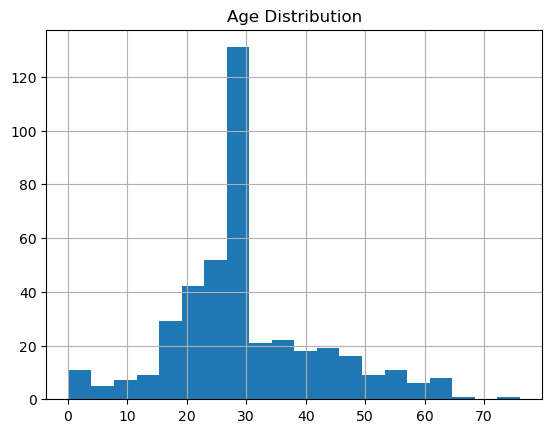

In [13]:
data['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

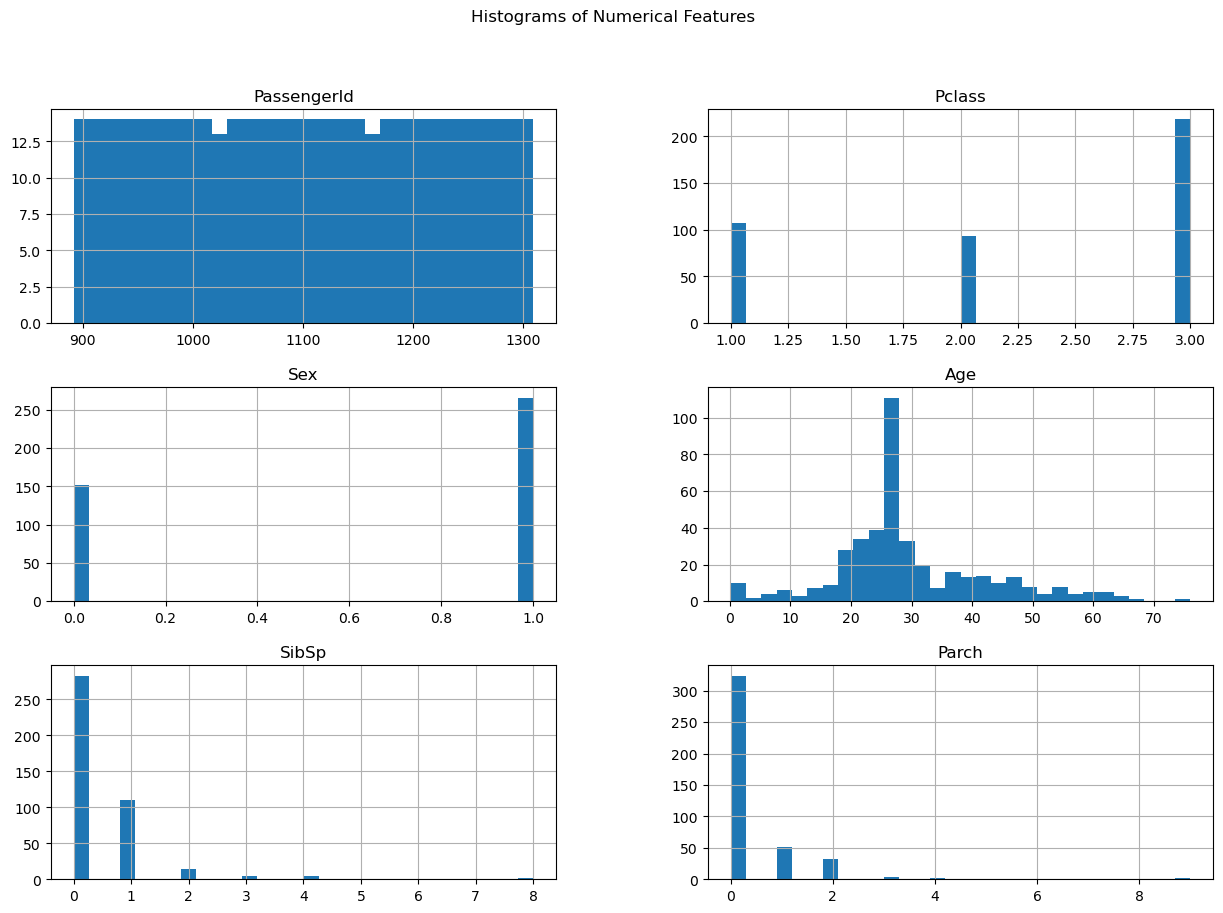

In [14]:
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

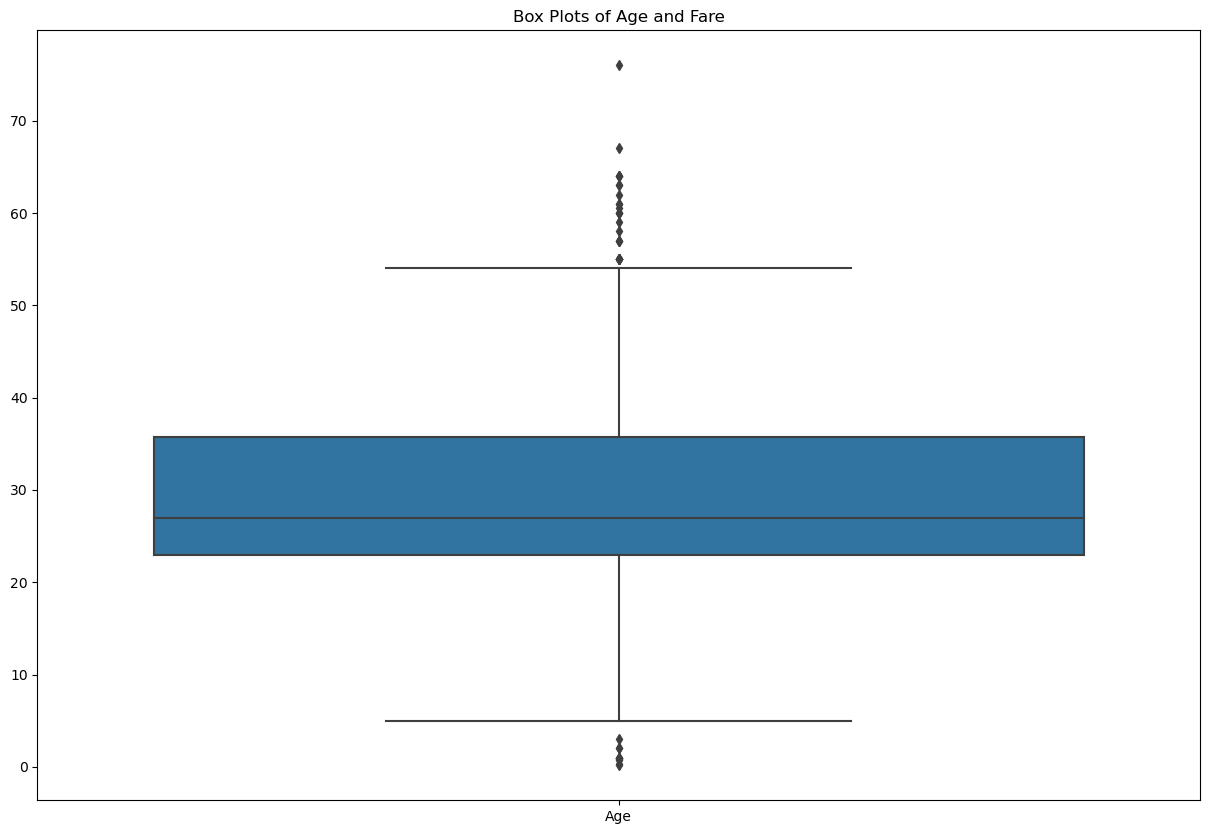

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['Age', 'Cabin']])
plt.title('Box Plots of Age and Fare')
plt.show()

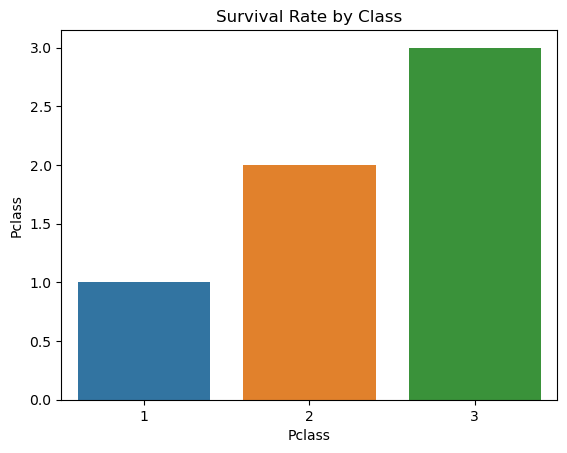

In [16]:
sns.barplot(x='Pclass', y='Pclass', data=data)
plt.title('Survival Rate by Class')
plt.show()

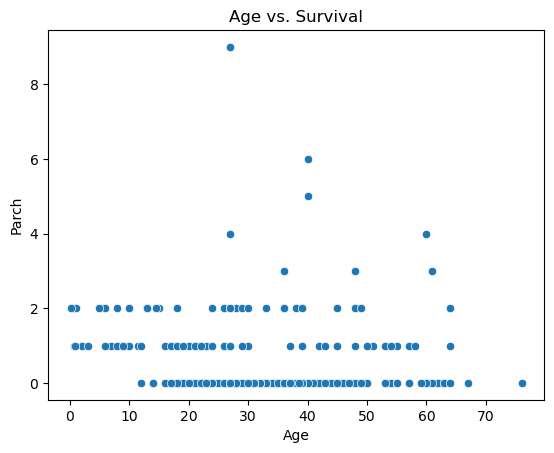

In [17]:
sns.scatterplot(x='Age', y='Parch', data=data)
plt.title('Age vs. Survival')
plt.show()

In [3]:
df=pd.read_csv("Titanic_train.csv")

#### EDA

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.shape

(891, 12)

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop('Cabin',axis=1,inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

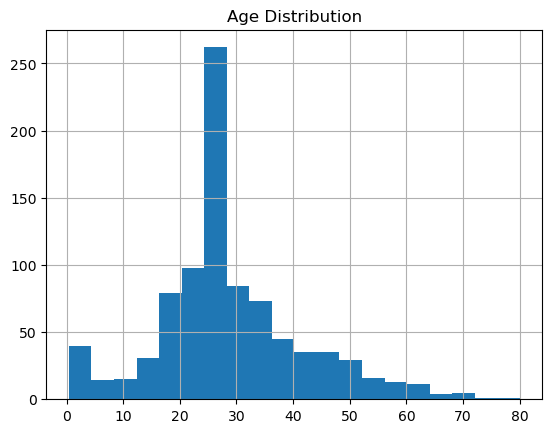

In [16]:
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

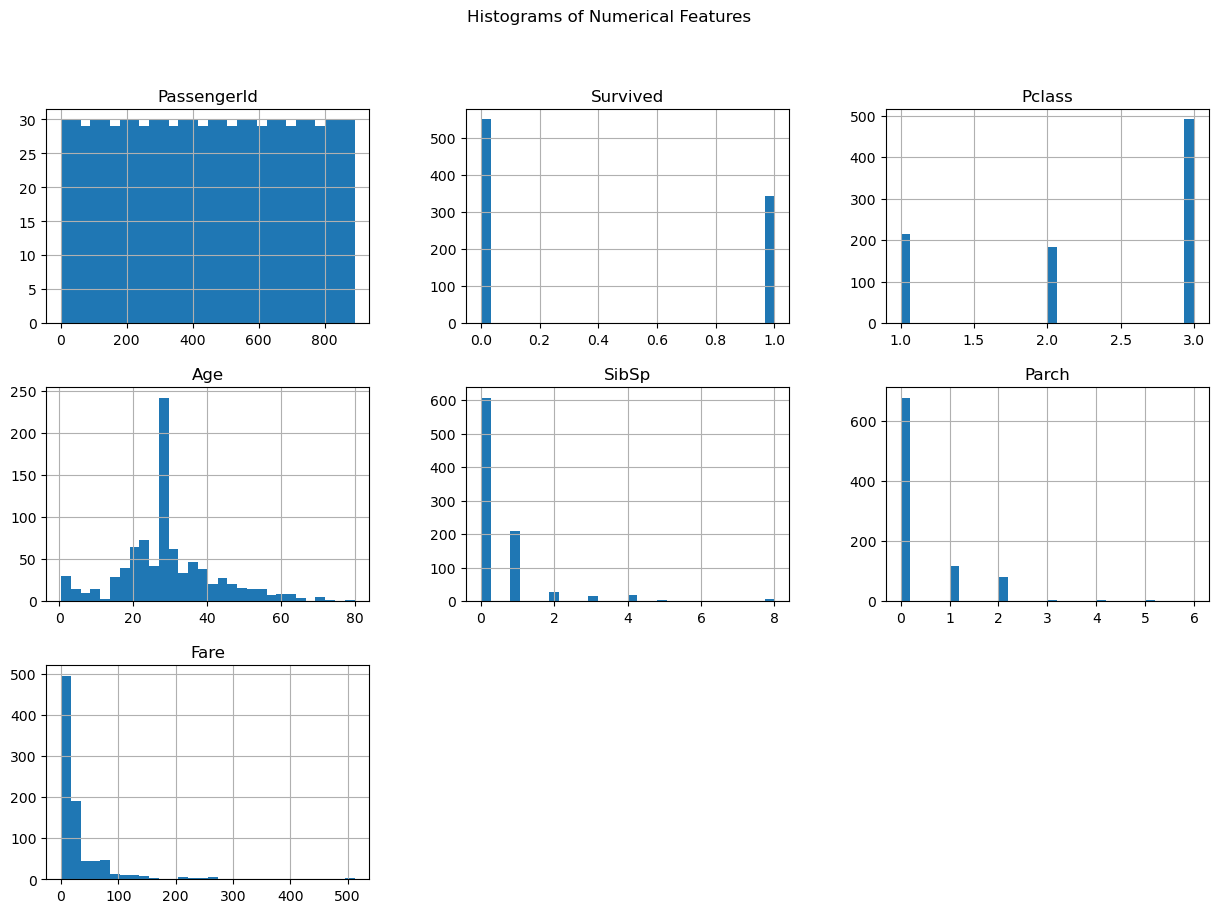

In [17]:
df.hist(bins=30,figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

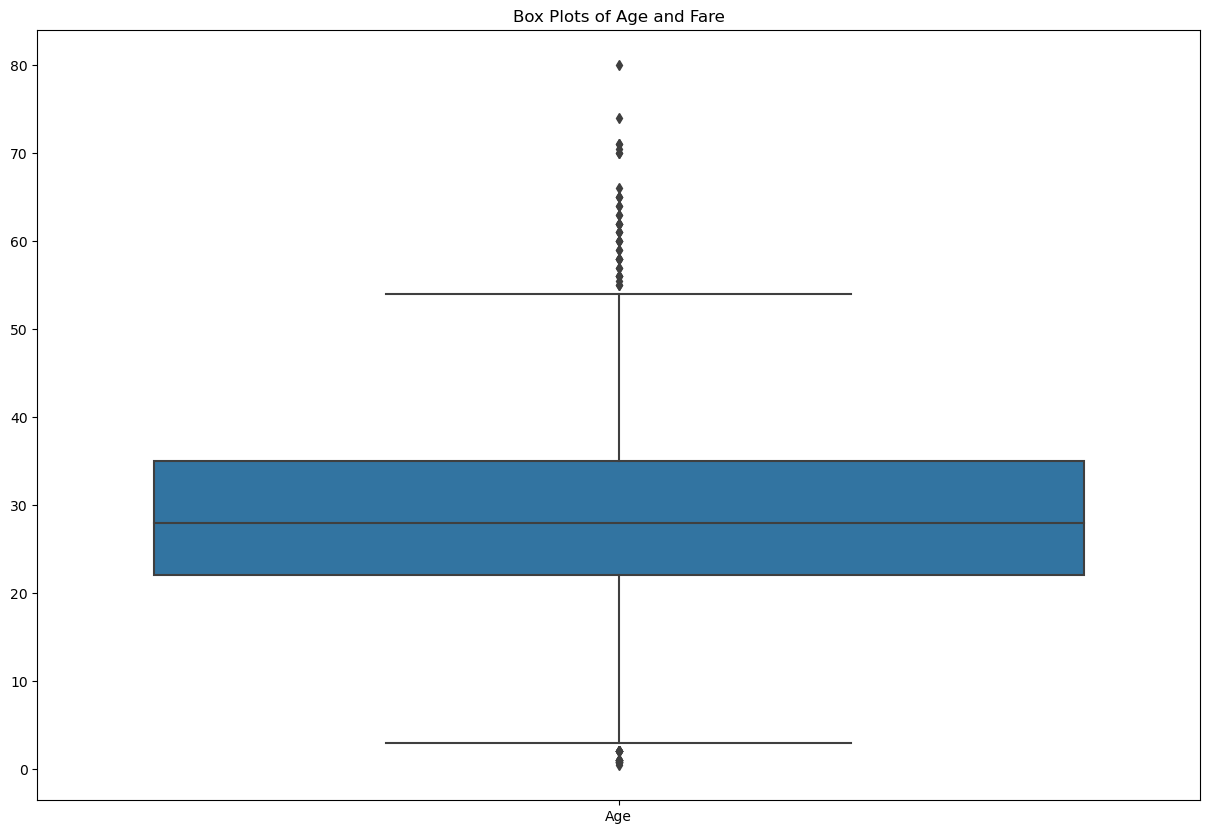

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['Age']])
plt.title('Box Plots of Age and Fare')
plt.show()

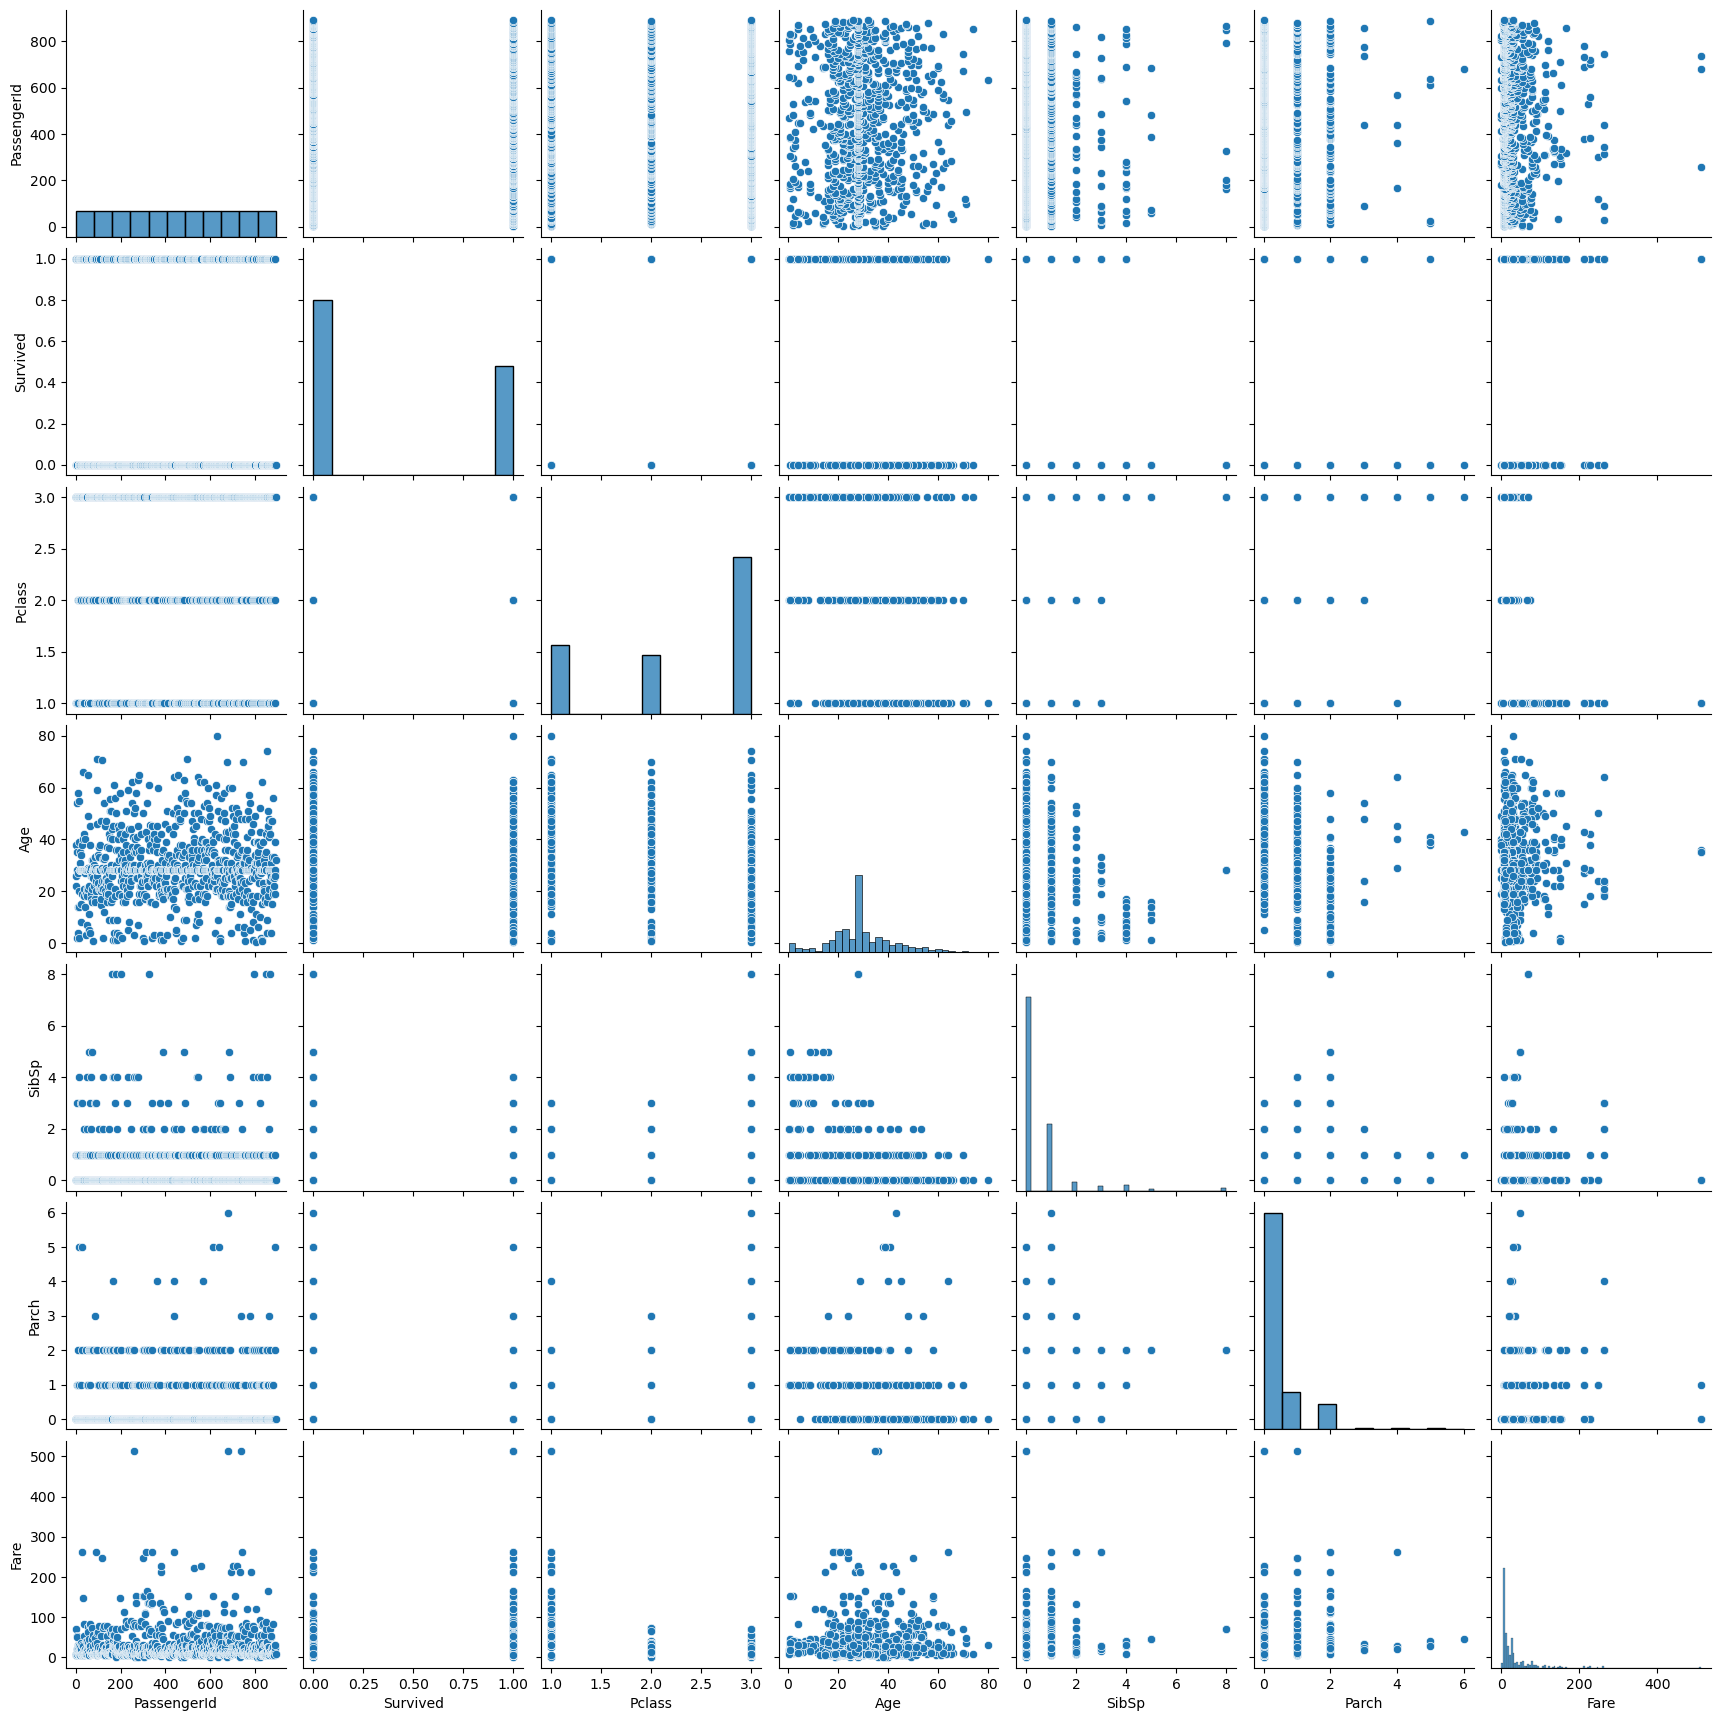

In [20]:
sns.pairplot(df)

#### Data Preprocessing

In [39]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_1,Embarked_1,Embarked_2
0,1,0,3,108,22.0,1,0,523,7.2500,1,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,0,0,0
2,3,1,3,353,26.0,0,0,669,7.9250,0,0,1
3,4,1,1,272,35.0,1,0,49,53.1000,0,0,1
4,5,0,3,15,35.0,0,0,472,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,27.0,0,0,101,13.0000,1,0,1
887,888,1,1,303,19.0,0,0,14,30.0000,0,0,1
888,889,0,3,413,28.0,1,2,675,23.4500,0,0,1
889,890,1,1,81,26.0,0,0,8,30.0000,1,0,0


In [34]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

#### Building Predictive Models

In [35]:
features=df.drop(['Survived'],axis=1)
target=df['Survived']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)
print(x_train.shape)
print(y_train.shape)

(712, 11)
(712,)


In [42]:
cols=x_train.columns
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train=pd.DataFrame(x_train,columns=cols)
x_test=pd.DataFrame(x_test,columns=cols)

#### XGBoost algorithms

In [50]:
from xgboost import XGBClassifier

In [48]:
!pip install xgboost==1.5.0
from sklearn import set_config

set_config(display="text")
from xgboost import XGBClassifier

model = XGBClassifier()
print(model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


ERROR: Could not find a version that satisfies the requirement xgboost==1.5.0 (from versions: none)
ERROR: No matching distribution found for xgboost==1.5.0


In [49]:
model.fit(x_train,y_train)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
y_train_pred=xgb_model.predict(x_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [70]:
y_pred_xgb=xgb_model.predict(x_test)
y_pred_xgb

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [71]:
accuracy = accuracy_score(y_test,y_pred_xgb)
print("LightGBM Accuracy:", accuracy)

LightGBM Accuracy: 0.8324022346368715


In [53]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("\nXGBOOST Model Evaluation:")
print(classification_report(y_test,xgb_model.predict(x_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,xgb_model.predict(x_test)))


XGBOOST Model Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[95 10]
 [20 54]]


#### LightGBM Algorithm

In [54]:
from lightgbm import LGBMClassifier
lgb_model=LGBMClassifier()
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [63]:
y_pred_lgb=lgb_model.predict(x_train)
y_pred_lgb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [66]:
accuracy=accuracy_score(y_train,y_pred_lgb)
print("LightGBM Accuracy:", accuracy)

LightGBM Accuracy: 1.0


In [57]:
print("\nLightGBM  Model Evaluation:")
print(classification_report(y_test,lgb_model.predict(x_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,lgb_model.predict(x_test)))


LightGBM  Model Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[93 12]
 [18 56]]


#### Comparative Analysis

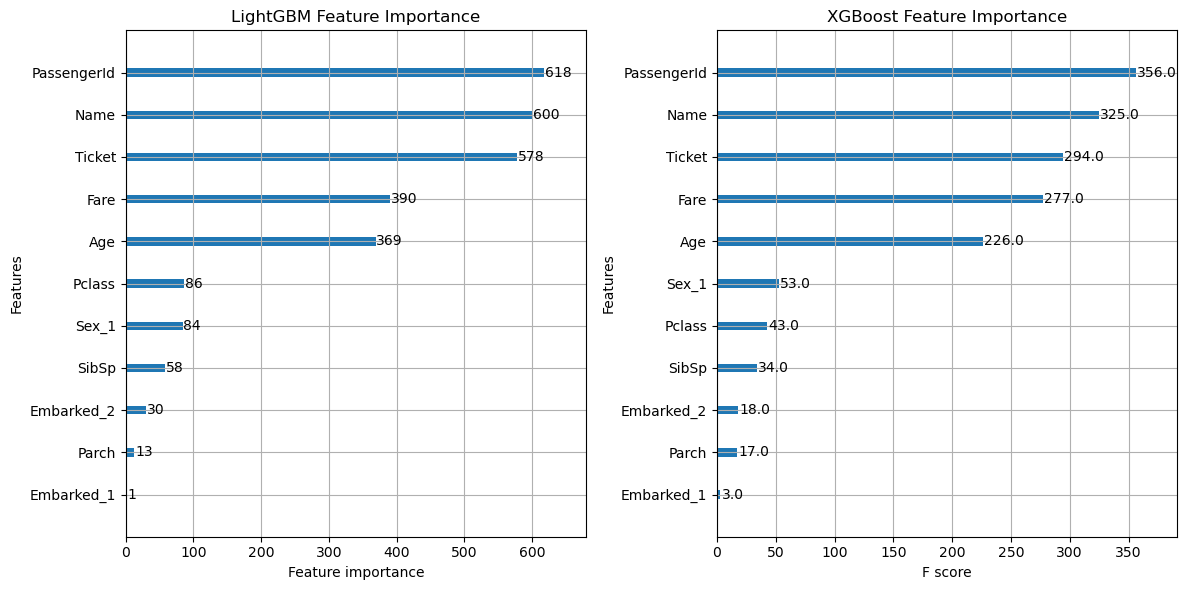

In [58]:
import lightgbm as lgb
import xgboost as xgb
fig, ax = plt.subplots(1,2,figsize=(12, 6))
lgb.plot_importance(lgb_model, ax=ax[0])
ax[0].set_title("LightGBM Feature Importance")
xgb.plot_importance(xgb_model,ax=ax[1])
ax[1].set_title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

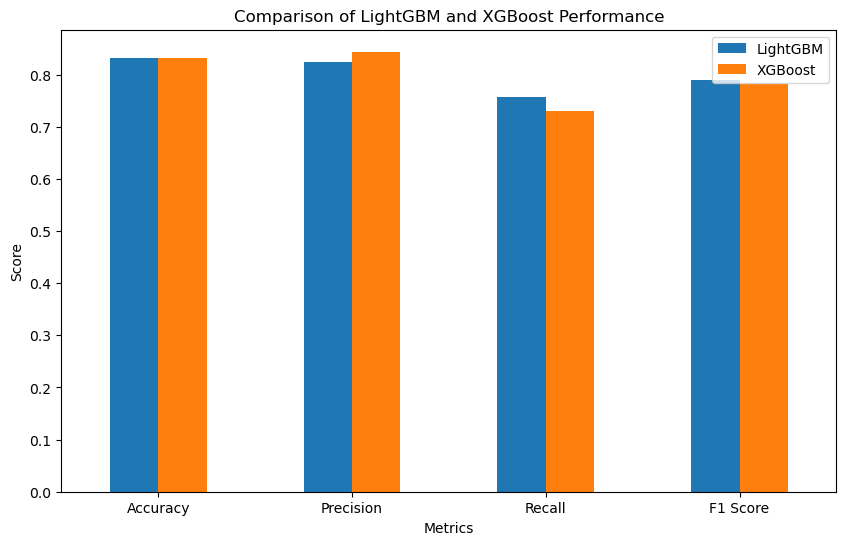

In [77]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lightgbm_scores = [
    accuracy_score(y_test,lgb_model.predict(x_test)),
    precision_score(y_test,lgb_model.predict(x_test)),
    recall_score(y_test,lgb_model.predict(x_test)),
    f1_score(y_test,lgb_model.predict(x_test))
]

xgboost_scores = [
    accuracy_score(y_test,xgb_model.predict(x_test)),
    precision_score(y_test,xgb_model.predict(x_test)),
    recall_score(y_test,xgb_model.predict(x_test)),
    f1_score(y_test,xgb_model.predict(x_test))
]
results_df = pd.DataFrame({
    'Metrics': metrics,
    'LightGBM': lightgbm_scores,
    'XGBoost': xgboost_scores
})

results_df.set_index('Metrics').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()